<a href="https://colab.research.google.com/github/BreakoutMentors/Data-Science-and-Machine-Learning/blob/master/machine_learning/mini_lessons/image_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processing Image Data
Computer vision is a field of machine learning that trains computers to interpret and understand the visual world. It is one of the most popular fields in deep learning (neural networks). In computer vision, it is common to use digital images from cameras and videos to train models to accurately identify and classify objects. 

Before we can solve computer vision tasks, it is important to understand how to handle  image data. To this end, we will demonstrate how to process (prepare) image data for machine learning models. 

We will use the `mnist` dataset, which is provided by Tensorflow Datasets--a collection of ready-to-use datasets for machine learning. All datasets are available through the `tf.data.Datasets` API endpoint, enabling us to easily access them. 

Here is the lesson roadmap:
- Getting the dataset
- Visualizing the data
- Transforming the data
- Normalizing the data

In [2]:
# TensorFlow and tf.keras and TensorFlow datasets
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

# Commonly used modules
import numpy as np


# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Getting the dataset
When we want to solve a problem with machine learning methods, the first step is almost always to find a good dataset. As we mentioned above, we will retrieve the `mnist` dataset using the `tf.data.Datasets` Tensorflow API endpoint. 

The MNIST dataset contains 70k images of handwritten digits (i.e., numbers between 0 and 9). Let's load the dataset into our notebook.

In [0]:
# Construct a tf.data.Dataset containing the beans dataset
mnist, mnist_info = tfds.load('mnist', split='train', shuffle_files=True, with_info=True)

The `with_info` parameter tells Tensorflow to extract the label and features info.

# Visualize the dataset
Now that we have the dataset let's visualize some samples.

We will use the `show_examples` function to visualize the images. 

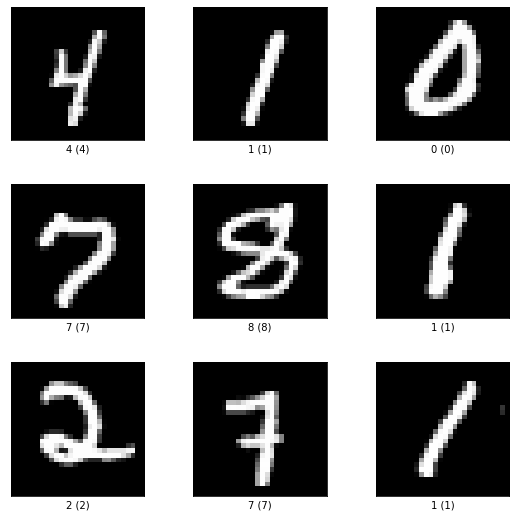

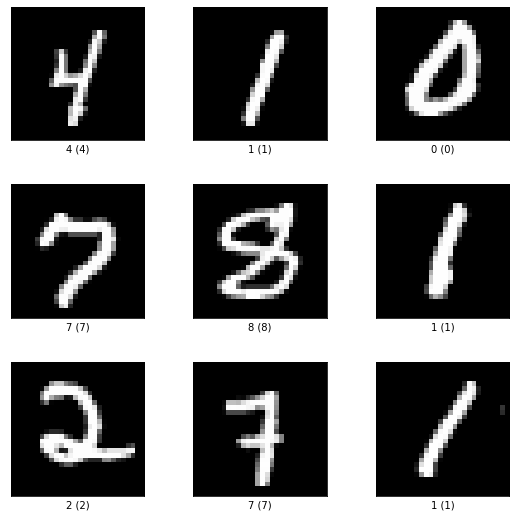

In [4]:
tfds.show_examples(ds=mnist, ds_info=mnist_info)

The above images give us a sense of the data, including samples belonging to different classes. 

# Transforming the data
Before we start transforming data, let's discuss *tensors*--a key part of the machine learning (ML) process, particularly for deep learning methods. 

As we learned in previous lessons, data, whether it be categorical or numerical in nature, is converted to a numerical representation to make it useful for machine learning models. In deep learning (neural networks), the numerical data is often stored in objects called *tensors*. A tensor is a container that can house data in $N$ dimensions. ML researchers sometimes use the term "tensor" and "matrix" interchangeably because a matrix is a 2-dimensional tensor. But, tensors are generalizations of matrices to $N$-dimensional space. 

<figure>
  <img src='https://www.kdnuggets.com/wp-content/uploads/scalar-vector-matrix-tensor.jpg' width='75%'>
  <figcaption>A scalar, vector ($2 \times 1$), matrix ($2 \times 1$), and tensor ($2 \times 2 \times 2$) .</figcaption>
</figure>





We represent these three colors using multi-dimensional arrays (arrays of arrays) called *tensors*. An image is a multi-dimensional array (i.e., matrix) of pixels, and each pixel is represented by a numerical value. For example, a small grayscale image may be composed of a $28 \times 28 \times$ matrix (array) of pixels. When images are not in grayscale (i.e., have color), they are defined by a *tensor*. A tensor is like an array of arrays. In machine learning, the subarrays are called "channels". 


It is common to represent a pixel value color values that correspond to a pixel in a given image. For instance, given a small color image of a dog, its tensor might be in the shape $28 \times 28 \times 3$. The 3rd tensor dimension (3) represents the number of channels that correspond pixels in a given image.

Let's see what shape the mnist digits images are in.

In [5]:
# a (2 x 2 x 2) tensor
my_tensor = np.array([
              [[1, 2], [3, 2]],
              [[1, 7],[5, 4]]
            ])

print('my_tensor shape:', my_tensor.shape)

my_tensor shape: (2, 2, 2)


Now let's discuss how images are stored in tensors. Computer screens are composed of pixels. Each pixel generates three colors of light (red, green, and blue) and the different colors we see are due to different combinations and intensities of these three primary colors.   

<figure>
  <img src='https://www.chem.purdue.edu/gchelp/cchem/RGBColors/BlackWhiteGray.gif' width='75%'>
  <figcaption>The colors black, white, and gray with a sketch of a pixel from each.</figcaption>
</figure>

We use tensors to store the pixel intensities for a given image. Colorized pictures have 3 different *channels*. Each channel contains a matrix that represents the intensity values that correspond to the pixels of a particular color (red, green, and blue; RGB for short). For instance, consider a small colorized $28 \times 28$ pixel image of a dog. Because the dog image is colorize, it has 3 channels, so its tensor shape is $28 \times 28 \times 3$.

Let's have a look at the shape of the images in the MNIST dataset.

In [6]:
mnist_info.features['image'].shape

(28, 28, 1)

Using the `mnist_info.features` dictionary object, we can retrieve the image shape by  the look at the 'image' key to figure out its dimensions. We see that images are in the tensor shape $28 \times 28 \times 1$. The 3rd dimension is only 1 channel rather than 3, this indicates that we are working with grayscale images. By grayscale, we mean the pixels don't have intensities for red, green, and blue channels but rather for one grayscale channel, which describes an image using combinations of various shades of gray. Pixel intensities range between $0$ and $255$, and in our case, they correspond to black $0$ to white $255$.  


Now let's reshape the images into $784 \times 1$ dimensional arrays. We call converting an image into an $n \times 1$ tensor "flattening". 

In [23]:
# get a subset of 5 images from the dataset
small_mnist = mnist.take(5)

# convert the Dataset to NumPy arrays 
for sample in tfds.as_numpy(small_mnist):
  image, label = sample['image'], sample['label']
  print('image shape:', image.shape)

print('-'*10)


# reshape images (note there are other ways to reshape the data with tensorflow)
# this is just one of them
reshaped_images, reshaped_labels = [], [] 
for sample in tfds.as_numpy(small_mnist):
  image_flat = sample['image'].reshape(-1, 1)
  label = sample['label']
  
  reshaped_images.append(image_flat)
  reshaped_labels.append(label)

  print('flattened image shape:', image_flat.shape)

# convert python list to numpy array
# (num samples, num features, num channels)
reshaped_images = np.array(reshaped_images) # a dataset with shape (5, 784, 1) 
reshaped_labels = np.array(reshaped_labels)

print('reshaped small mnist dataset features shape: ', reshaped_images.shape)

image shape: (28, 28, 1)
image shape: (28, 28, 1)
image shape: (28, 28, 1)
image shape: (28, 28, 1)
image shape: (28, 28, 1)
----------
flattened image shape: (784, 1)
flattened image shape: (784, 1)
flattened image shape: (784, 1)
flattened image shape: (784, 1)
flattened image shape: (784, 1)
reshaped small mnist dataset features shape:  (5, 784, 1)


We flattened each image by using the NumPy `reshape` method. Since one shape dimension can be -1, we used $(-1,1)$ as the parameters to `reshape`. In this case, the -1 tells the `reshape` to infer the final tensor shape from the length of the original array and the remaining parameter dimensions. In our example, this means $28 \times 28$ is flattened to produce $28 \cdot 28 = 784$ features, and the $1$ in the final parameter dimension indicates that the returned tensor will have shape $784 \times 1$.



# Normalizing the data

Another important transformation technique is *normalization*.  We use it to encourage machine learning models to learn generalizable features, which should lead to better results on unseen data. 

At a high level, normalization makes the data more, well...normal. There are various ways to normalize data. Perhaps the most common normalization approach for image data is to subtract the mean pixel value and divide by the standard deviation (this method is applied to every pixel).

In [29]:
# normalize the reshaped images
mean = reshaped_images.mean()
std = reshaped_images.std()

norm_images = reshaped_images.astype('float64')
norm_images -= mean
norm_images /= std

print(f'non-normalized images mean and std: {round(mean, 4)}, {round(std, 4)}')
print(f'normalized images mean and std: {round(norm_images.mean(), 4)}, {round(norm_images.std(), 4)}')

non-normalized images mean and std: 33.9931, 79.5976
normalized images mean and std: 0.0, 1.0


As we see above, the normalized pixel values are now centered around 0 (i.e., mean = 0) and have a standard deviation of 1.

# Summary
In this lesson we learned:
- TensorFlow Datasets offers many easy to access image datasets.
- Images are represented by *tensors*
- Tensors can be transformed (reshaped) and normalized easily using NumPy (or any other frameworks that enable tensor operations).   